# Figures 2

Generate figures matching theory and simulation of gradient metrics on linear dropout netoworks

## Setup

In [1]:
from __future__ import print_function
import os, sys
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("paper")
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.unicode'] = True
plt.rcParams['image.cmap'] = 'viridis'

# Add cornet and Theano to path
sys.path.insert(0, '../')
sys.path.insert(0, '/home/poole/Theano_clean')

# Output figure directory
figure_dir = "../writeup/figures"
results_dir = "../results"

## $g_{aa}$ on linear dropout networks (simulation)

In [2]:
import csv
import numpy as np

layer = 200; num_dp = 5; xis = np.linspace(1, layer, layer )
q_aa_sli = np.zeros((num_dp,layer)); q_ab_sli = np.zeros((num_dp,layer))

i1 = 0;  i2 = 0; 
for dp in range(6,11):
    j1 = 0; j2 = 0;
    with open('../data/gradient_li/linear_n5_r%saa_g.csv' %dp , newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=' ')
        for row in spamreader:
            q_aa_sli[i1,j1] = row[0]; j1= j1+1

    with open('../data/gradient_li/linear_n5_r%sab_g.csv' %dp  , newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=' ')
        for row in spamreader:
            q_ab_sli[i2,j2] = row[0]; j2 = j2+1   
    i1= i1+1;   i2= i2+1       

## $g_{aa}$ on linear dropout networks (theory)

In [3]:
sigmaw2 = 0.5; sigmab2 = 0.1
xis1 = np.linspace(1, layer,  layer)
q_aa_li = np.zeros((num_dp,layer)); q_ab_li = np.zeros((num_dp,layer))
i = 0
for dp in range(6,11):
    rho = dp*0.1
    qstar = sigmab2/(1-sigmaw2/rho)
    cstar = sigmab2/(1-sigmaw2)
    sum_part1 = 0; sum_part2 = 0;
    for l in range(layer):
        truel = layer-l
        if (truel==layer):
            sum_part1 = sum_part1 + rho
        else:
            sum_part1 = sum_part1 + (sigmaw2/rho)**(l)
        q_aa_li[i,truel-1] = 4*(qstar/rho)*(sigmaw2/rho)**(l)*(sum_part1)*qstar/rho
        
        sum_part2 = sum_part2 + (sigmaw2/rho**2)**(l)
        q_ab_li[i,truel-1] = 4*(cstar)*(sigmaw2)**(l)*(sum_part2)*cstar 
    i = i+1    

## $g_{aa}^l = g_{aa}^{l+1} \chi_1$ on linear dropout networks

In [6]:
chi1 = np.zeros((num_dp,layer))
i = 0
chi1[0,0] = 4e-18
chi1[1,0] = 4e-32
chi1[2,0] = 4e-44
chi1[3,0] = 4e-54
for dp in range(6,11):
    rho = dp*0.1
    #chi1[i,0] = 1e-17
    for l in range(1,layer):
        chi1[i,l] =  rho/sigmaw2*chi1[i,l-1]
    i = i+1      

# Figure 2:  Theoretical calculations versus network simulations for metric of gradient
(a) $g^l_{aa}$ as a function of layer $l$, for a 200 layers random linear network with $\sigma_w^2 = 0.5$ and $\sigma_b^2 =0.1$. Excellent agreement is observed between empirical simulations of networks of width 1000 (dashed lines) and theoretical calculations (solid lines). (b) $g^l_{ab}$ as a function of layer $l$. Theoretical calculations (solid lines) fail to predict empirical simulations (dashed lines). (c) $g^l_{ab}$ as a function of layer $l$ in the range of length $l=170-200$. Theoretical calculations (solid lines) can predict empirical simulations (dashed lines) in the few last layers. (d) $g^l_{ab}$ as a function of layer $l$. The solid lines are $g^l_{ab} \propto \chi_1^{L-l} $ for different $\rho$. Theoretical calculations failed to predict empirical simulations (dashed lines).

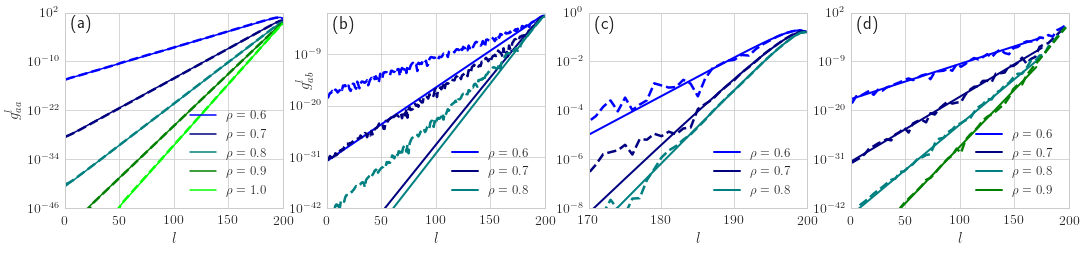

In [7]:
plt.figure(figsize=(18, 3.6))
gs = plt.GridSpec(1, 4)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)

a1 = plt.subplot(gs[0, 0])
plt.semilogy(xis1, q_aa_li[0],color=[0,0,1],lw=1.5,label=r'$\rho = 0.6$')
plt.semilogy(xis1, q_aa_sli[0],'--',lw=2.5,color=[0,0,1])
plt.semilogy(xis1, q_aa_li[1],color=[0,0,0.5],lw=1.5,label=r'$\rho = 0.7$')
plt.semilogy(xis1, q_aa_sli[1],'--',lw =2.5, color=[0,0,0.5])
plt.semilogy(xis1, q_aa_li[2],color=[0,0.5,0.5],lw=1.5,label=r'$\rho = 0.8$')
plt.semilogy(xis1, q_aa_sli[2],'--',lw = 2.5, color=[0,0.5,0.5])
plt.semilogy(xis1, q_aa_li[3],color=[0,0.5,0],lw=1.5,label=r'$\rho = 0.9$')
plt.semilogy(xis1, q_aa_sli[3],'--',lw=2.5,color=[0,0.5,0])
plt.semilogy(xis1, q_aa_li[4],color=[0,1,0],lw=1.5,label=r'$\rho = 1.0$')
plt.semilogy(xis1, q_aa_sli[4],'--',lw =2.5,color=[0,1,0])
 

plt.xlabel('$l$', fontsize=15); plt.ylabel('$g_{aa}^{l}$', fontsize=15)
plt.xticks([0, 50, 100, 150, 200]); plt.yticks([1e-46,1e-34, 1e-22, 1e-10, 1e2]);
plt.ylim(1e-46, 100); plt.xlim(0, 200);
plt.annotate('(a)', xy=(0, 1), xytext=(5.5, 0.01), fontsize=18)
plt.legend(loc=(0.55,0.03),fontsize=13)


a2 = plt.subplot(gs[0, 1])

plt.semilogy(xis1, q_ab_li[0],color=[0,0,1],lw=2.0,label=r'$\rho = 0.6$')
plt.semilogy(xis1, np.abs(q_ab_sli[0]),'--',color=[0,0,1],lw=2.5)
plt.semilogy(xis1, q_ab_li[1],color=[0,0,0.5],lw=2.0,label=r'$\rho = 0.7$')
plt.semilogy(xis1, np.abs(q_ab_sli[1]),'--',color=[0,0,0.5],lw=2.5)
plt.semilogy(xis1, q_ab_li[2],color=[0,0.5,0.5],lw=2.0,label=r'$\rho = 0.8$')
plt.semilogy(xis1, np.abs(q_ab_sli[2]),'--',color=[0,0.5,0.5],lw=2.5)

plt.xticks([0, 50, 100, 150, 200]); plt.yticks([1e-42,1e-31, 1e-20, 1e-9, 1e2]);
plt.ylim(1e-42, 1); plt.xlim(0, 200);
plt.annotate('(b)', xy=(0, 1), xytext=(5.5, 0.0003), fontsize=18)
plt.xlabel('$l$', fontsize=15); plt.ylabel('$g_{ab}^{l}$', fontsize=15)
a2.yaxis.set_label_coords(-0.05,0.65)
plt.legend(loc=(0.55,0.03),fontsize=13)


a3 = plt.subplot(gs[0, 2])

plt.semilogy(xis1, q_ab_li[0],color=[0,0,1],lw=2.0,label=r'$\rho = 0.6$')
plt.semilogy(xis1, np.abs(q_ab_sli[0]),'--',color=[0,0,1],lw=2.5)
plt.semilogy(xis1, q_ab_li[1],color=[0,0,0.5],lw=2.0,label=r'$\rho = 0.7$')
plt.semilogy(xis1, np.abs(q_ab_sli[1]),'--',color=[0,0,0.5],lw=2.5)
plt.semilogy(xis1, q_ab_li[2],color=[0,0.5,0.5],lw=2.0,label=r'$\rho = 0.8$')
plt.semilogy(xis1, np.abs(q_ab_sli[2]),'--',color=[0,0.5,0.5],lw=2.5)

plt.xticks([170, 180,190, 200]); plt.yticks([1e-8,1e-6, 1e-4, 1e-2,1]);
plt.ylim(1e-8, 1); plt.xlim(170, 200);
plt.annotate('(c)', xy=(171, 0.1), xytext=(170.8, 0.2), fontsize=18)
plt.xlabel('$l$', fontsize=15);
plt.legend(loc=(0.55,0.03),fontsize=13)


a4 = plt.subplot(gs[0, 3])

plt.semilogy(xis1[::4], np.abs(q_ab_sli[0][::4]),'--',color=[0,0,1],lw=2.5)
plt.semilogy(xis1[0:175], chi1[0][0:175],color=[0,0,1],lw=2.0,label=r'$\rho = 0.6$')
plt.semilogy(xis1[::4], np.abs(q_ab_sli[1][::4]),'--',color=[0,0,0.5],lw=2.5)
plt.semilogy(xis1[0:175], chi1[1][0:175],color=[0,0,0.5],lw=2.0,label=r'$\rho = 0.7$')
plt.semilogy(xis1[::4], np.abs(q_ab_sli[2][::4]),'--',color=[0,0.5,0.5],lw=2.5)
plt.semilogy(xis1[0:175], chi1[2][0:175],color=[0,0.5,0.5],lw=2.0,label=r'$\rho = 0.8$')
plt.semilogy(xis1[::4], np.abs(q_ab_sli[3][::4]),'--',color=[0,0.5,0],lw=2.5)
plt.semilogy(xis1[0:170], chi1[3][0:170],color=[0,0.5,0],lw=2.0,label=r'$\rho = 0.9$')

plt.xticks([0, 50, 100, 150, 200]); plt.yticks([1e-42,1e-31, 1e-20, 1e-9, 1e2]);
plt.ylim(1e-42, 100); plt.xlim(0, 200);
plt.annotate('(d)', xy=(0, 1), xytext=(5.5, 0.02), fontsize=18)
a3.yaxis.set_label_coords(0.12,0.7)
plt.xlabel('$l$', fontsize=15); 
plt.legend(loc=(0.55,0.03),fontsize=13)

#plt.savefig(os.path.join(figure_dir, "fig3_gradient.pdf" ), bbox_inches='tight')